In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read input data
inp_exp = pd.read_csv('D:/jupyter files/Expedia_train.csv')
inp_exp.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66.0,348.0,48862.0,2234.2641,12.0,0.0,1.0,...,0.0,1.0,8250.0,1.0,0.0,3.0,2.0,50.0,628.0,1.0
1,2014-08-11 08:22:12,2,3,66.0,348.0,48862.0,2234.2641,12.0,0.0,1.0,...,0.0,1.0,8250.0,1.0,1.0,1.0,2.0,50.0,628.0,1.0
2,2014-08-11 08:24:33,2,3,66.0,348.0,48862.0,2234.2641,12.0,0.0,0.0,...,0.0,1.0,8250.0,1.0,0.0,1.0,2.0,50.0,628.0,1.0
3,2014-08-09 18:05:16,2,3,66.0,442.0,35390.0,913.1932,93.0,0.0,0.0,...,0.0,1.0,14984.0,1.0,0.0,1.0,2.0,50.0,1457.0,80.0
4,2014-08-09 18:08:18,2,3,66.0,442.0,35390.0,913.6259,93.0,0.0,0.0,...,0.0,1.0,14984.0,1.0,0.0,1.0,2.0,50.0,1457.0,21.0


In [3]:
inp_exp.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country        float64
user_location_region         float64
user_location_city           float64
orig_destination_distance    float64
user_id                      float64
is_mobile                    float64
is_package                   float64
channel                      float64
srch_ci                       object
srch_co                       object
srch_adults_cnt              float64
srch_children_cnt            float64
srch_rm_cnt                  float64
srch_destination_id          float64
srch_destination_type_id     float64
is_booking                   float64
cnt                          float64
hotel_continent              float64
hotel_country                float64
hotel_market                 float64
hotel_cluster                float64
dtype: object

In [3]:
# Select columns to be used for training
inp_exp = inp_exp[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt','is_package']]

# Change the data type of the column 
inp_exp['date_time'] = pd.to_datetime(inp_exp['date_time'])

# Drop rows with NUll values
inp_exp.dropna(inplace=True)


In [4]:
#Split data into train and test dataset
exp_train, exp_test = train_test_split(inp_exp, test_size=0.20,
                                       random_state=101)

X_train = exp_train[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt']]
Y_train = exp_train[['is_package']]

X_test = exp_test[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt']]
Y_test = exp_test[['is_package']]

In [5]:
# Transformation for train dataset
X_train['BookYear'] = X_train.date_time.dt.year
X_train['BookMonth'] = X_train.date_time.dt.month
X_train['BookDay'] = X_train.date_time.dt.day
X_train['BookHour'] = X_train.date_time.dt.hour
X_train['BookWkDayName'] = X_train.date_time.dt.day_name()

X_train.drop(['date_time'],axis=1, inplace=True)

# Transformation for test dataset
X_test['BookYear'] = X_test.date_time.dt.year
X_test['BookMonth'] = X_test.date_time.dt.month
X_test['BookDay'] = X_test.date_time.dt.day
X_test['BookHour'] = X_test.date_time.dt.hour
X_test['BookWkDayName'] = X_test.date_time.dt.day_name()

X_test.drop(['date_time'],axis=1, inplace=True)

In [6]:
X_train.head(n=2)

,site_name,orig_destination_distance,srch_adults_cnt,srch_children_cnt,BookYear,BookMonth,BookDay,BookHour,BookWkDayName
3604,8,1317.1723,2.0,1.0,2013,12,4,14,Wednesday
2199,13,6483.8538,2.0,0.0,2014,3,30,12,Sunday


In [7]:
# Add categorical variables
categorical_columns = ['BookWkDayName','BookMonth']
X_train = pd.get_dummies(X_train, columns=categorical_columns, prefix_sep="_")
X_test = pd.get_dummies(X_test, columns=categorical_columns, prefix_sep="_")

#Align Test schema with train schema
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# scale train dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

In [8]:
# train logistic regression & cross validation
clf_L2 = LogisticRegressionCV(Cs=100, cv=10, penalty='l2', multi_class='multinomial', random_state=0, solver='lbfgs', n_jobs=-1) 
clf_L2.fit(X_train_scaled, Y_train)

C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegressionCV(Cs=100, cv=10, multi_class='multinomial', n_jobs=-1,
                     random_state=0)

In [9]:
# Retrieve the coefficients for feature selection
imp = clf_L2.coef_
coef = pd.Series(imp[0], index = X_train.columns)

Text(0.5, 1.0, 'Feature importance graph')

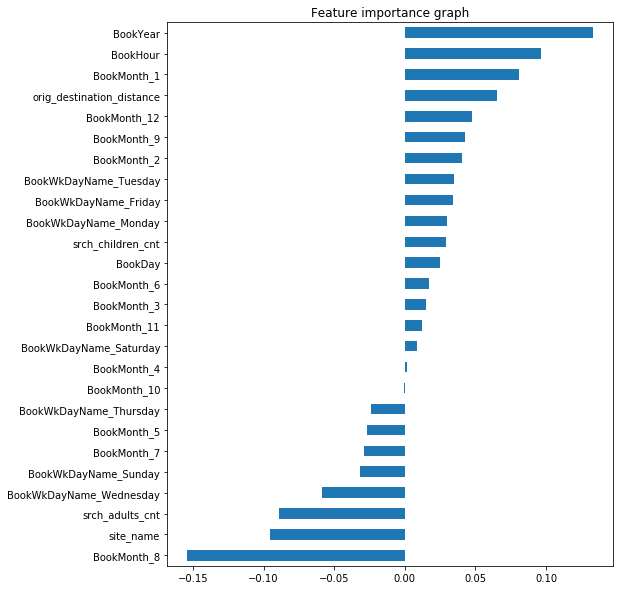

In [37]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance graph")

Text(0.5, 1.0, 'Feature importance graph')

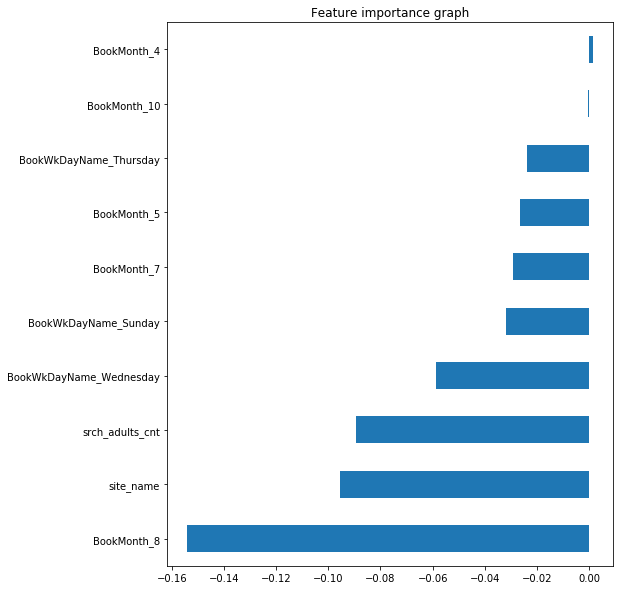

In [40]:
# Select top 10 features on the basis of magnitude of coefficient
imp_coef = coef.sort_values().head(10)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance graph")

In [12]:
print('1/alpha = ', clf_L2.C_) 
print('coef = ', clf_L2.coef_)
print('accuracy = ', clf_L2.score(X_test_scaled,Y_test))

1/alpha =  [0.00869749]
coef =  [[-0.09560847  0.06494582 -0.08924735  0.02917625  0.1334028   0.02464139
   0.09625576  0.0342625   0.02970165  0.00861802 -0.03173463 -0.02397142
   0.03489376 -0.05886765  0.08074779  0.04016891  0.01482245  0.00151065
  -0.02660977  0.01697334 -0.02926388 -0.15401446  0.04266094 -0.000595
   0.01210541  0.04783323]]
accuracy =  0.6893203883495146


In [33]:
Y_test['Predict_pkg'] = clf_L2.predict(X_test_scaled)

C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
Y_test.to_csv('ClassifyCode.csv',index=False)

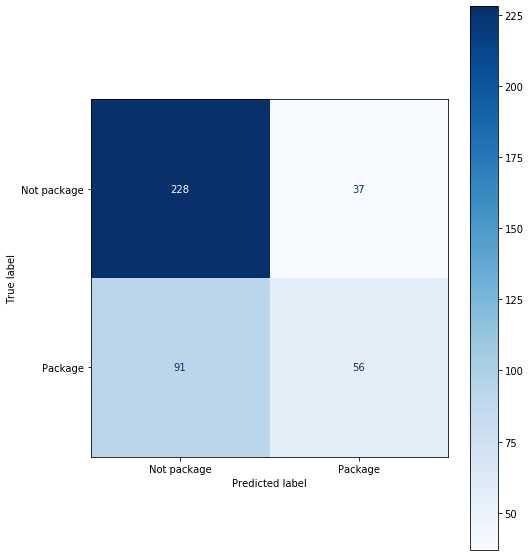

In [32]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Not package', 'Package']
plot_confusion_matrix(clf_L2,X_test_scaled,Y_test,display_labels=class_names,cmap=plt.cm.Blues)
plt.show()

### Performing prediction on Actual data
 Now we will read a new dataset and perform predictions to submit

In [16]:
# Use model to make predictions
## Read file for making prediction
predict_exp = pd.read_csv('D:/jupyter files/Expedia_Test.csv')
predict_exp = predict_exp[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt']]

# Drop rows with NUll values
predict_exp.dropna(inplace=True)

In [18]:
# Transformation for test dataset
predict_exp['date_time'] = pd.to_datetime(predict_exp['date_time'])

predict_exp['BookYear'] = predict_exp.date_time.dt.year
predict_exp['BookMonth'] = predict_exp.date_time.dt.month
predict_exp['BookDay'] = predict_exp.date_time.dt.day
predict_exp['BookHour'] = predict_exp.date_time.dt.hour
predict_exp['BookWkDayName'] = predict_exp.date_time.dt.day_name()

predict_exp.drop(['date_time'],axis=1, inplace=True)

predict_exp = pd.get_dummies(predict_exp, columns=categorical_columns, prefix_sep="_")

#Align Test schema with train schema
X_train, predict_exp = X_train.align(predict_exp, join='left', axis=1, fill_value=0)

# scale prediction
predict_exp_scaled = scaler.transform(predict_exp)

In [19]:
# Predicting outputfor test data
predict_exp['y_out'] = clf_L2.predict(predict_exp_scaled)

In [20]:
predict_exp

,site_name,orig_destination_distance,srch_adults_cnt,srch_children_cnt,BookYear,BookDay,BookHour,BookWkDayName_Friday,BookWkDayName_Monday,BookWkDayName_Saturday,...,BookMonth_4,BookMonth_5,BookMonth_6,BookMonth_7,BookMonth_8,BookMonth_9,BookMonth_10,BookMonth_11,BookMonth_12,y_out
0,2,5539.0567,2.0,0.0,2015,3,17,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
1,2,5873.2923,2.0,0.0,2015,24,17,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
2,2,3975.9776,4.0,0.0,2015,7,15,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
3,2,1508.5975,2.0,0.0,2015,14,14,0,1,0,...,0,0,0,0,0,1,0,0,0,1.0
4,2,66.7913,2.0,0.0,2015,17,9,1,0,0,...,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2,494.1257,3.0,1.0,2015,22,17,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
251,2,7.9635,1.0,0.0,2015,17,11,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
264,2,802.1144,2.0,0.0,2015,16,19,0,1,0,...,0,0,0,0,0,0,0,1,0,1.0
265,2,2154.4324,2.0,0.0,2015,9,22,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
